<a href="https://colab.research.google.com/github/thummalurusrinija/Fake-Currency-Detection/blob/main/Fake_currency_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
import numpy as np
import glob
import os
from google.colab import drive
drive.mount('/content/drive')

IMAGE_SIZE = [224, 224]
train_path = "/content/drive/MyDrive/fake currency/Train"
valid_path = "/content/drive/MyDrive/fake currency/Test"


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
folders = glob.glob('/content/drive/MyDrive/fake currency/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/fake currency/Train/2Hundrednote',
 '/content/drive/MyDrive/fake currency/Train/1Hundrednote']

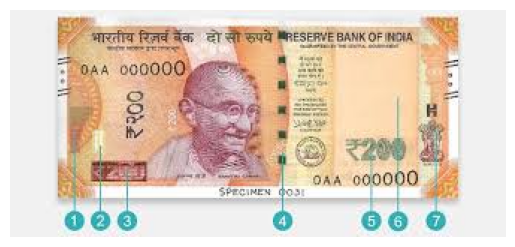

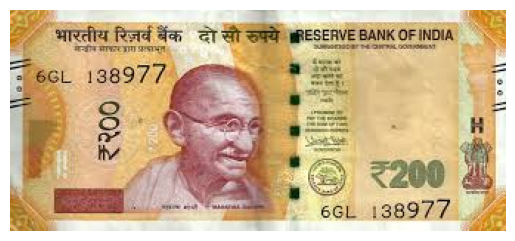

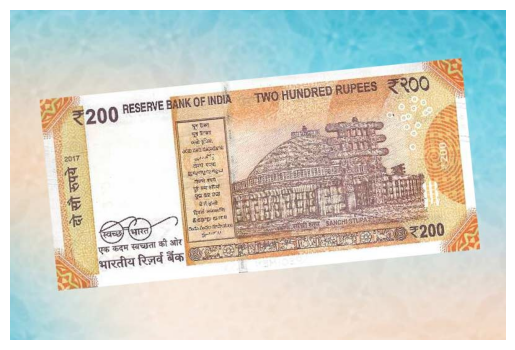

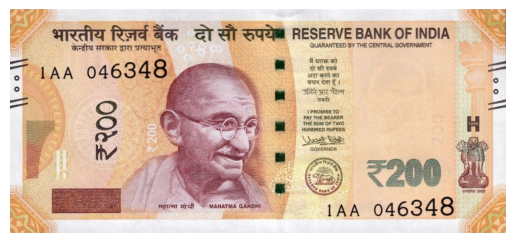

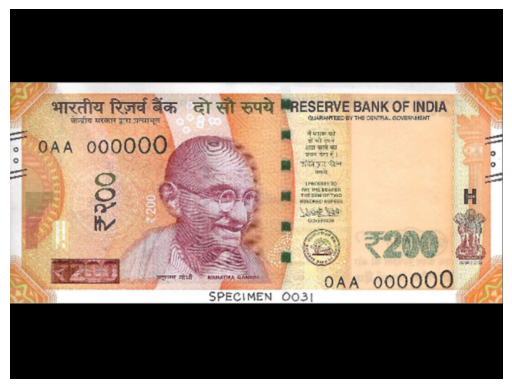

In [ ]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from glob import glob
import os

train_image_files = glob(os.path.join(train_path, '*/*.jpg'))
num_images_to_display = 5
for img_path in train_image_files[:num_images_to_display]:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = datagen.flow_from_directory(train_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]), batch_size=32, class_mode='categorical')
valid_set = datagen.flow_from_directory(valid_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]), batch_size=32, class_mode='categorical')
base_model = MobileNet(weights='imagenet', include_top=False,input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(train_set, validation_data=valid_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Found 30 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step - accuracy: 0.7000 - loss: 0.6416 - val_accuracy: 0.5000 - val_loss: 0.8602
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7333 - loss: 0.4187 - val_accuracy: 0.5000 - val_loss: 0.8753
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7667 - loss: 0.3006 - val_accuracy: 0.5000 - val_loss: 0.7501
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.9667 - loss: 0.1753 - val_accuracy: 0.5000 - val_loss: 0.6154
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 0.1030 - val_accuracy: 0.5833 - val_loss: 0.5569
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.0679 - val_accuracy: 0.7500 - val_loss: 0.4446
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 0.0462 - val_accuracy: 0.7500 - val_loss: 0.4705
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0311 - val_accuracy: 0.8333 - val_loss: 0.3347
Epoch 9/10
1

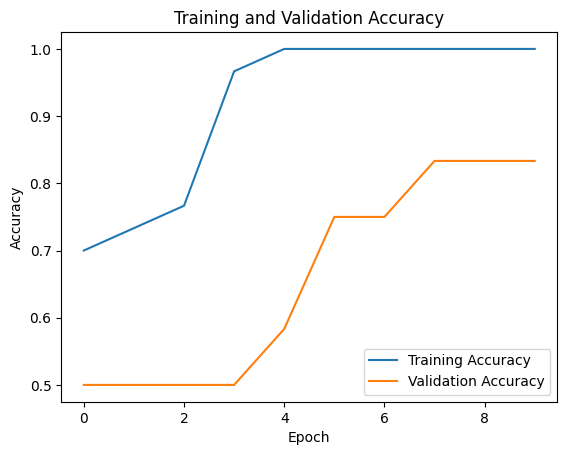

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
training_accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']

print("===== Training Summary =====")
print(f"Final Training Accuracy: {training_accuracy[-1] * 100:.2f}%")
print(f"Peak Validation Accuracy: {max(validation_accuracy) * 100:.2f}%")


===== Training Summary =====
Final Training Accuracy: 100.00%
Peak Validation Accuracy: 83.33%


In [ ]:
model.save("fake_currrecy_detection.h5")


In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('fake_currrecy_detection.h5')

In [ ]:
test_image_path = '/content/drive/MyDrive/fake currency/Train/1Hundrednote/1.jpg'

test_img = image.load_img(test_image_path, target_size=IMAGE_SIZE)
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)


test_img_array = test_img_array / 255.0

predictions = loaded_model.predict(test_img_array)
class_labels =  ['Class_0', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6']
fake_classes = {0, 1, 2}
real_classes = {3, 4, 5, 6}

predicted_class_index = np.argmax(predictions[0])

if predicted_class_index in fake_classes:
    predicted_class_label = "Fake"
elif predicted_class_index in real_classes:
    predicted_class_label = "Real"
else:
    predicted_class_label = "Unknown"

print("Predicted class:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Fake


In [ ]:
print("Predictions:", predictions)
print("Predictions Shape:", predictions.shape)


Predictions: [[0.96959966 0.03040032]]
Predictions Shape: (1, 2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Ensure num_classes is defined correctly
num_classes = len(folders)  # Assuming 'folders' is your list of class names

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(120, activation='relu'),
    Dense(num_classes, activation="softmax")  # ✅ Use integer, not a list
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(train_set, epochs=25, validation_data=valid_set)

model.save("cnn_model.h5")  # ✅ This will now work correctly


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │    11,197,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           242 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,202,890 (42.74 MB)

 Trainable params: 11,202,890 (42.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2667 - loss: 0.7560 - val_accuracy: 0.5000 - val_loss: 38.0269
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7333 - loss: 19.3437 - val_accuracy: 0.5000 - val_loss: 19.4531
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7333 - loss: 9.7328 - val_accuracy: 0.8333 - val_loss: 0.3205
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8667 - loss: 0.2951 - val_accuracy: 0.5000 - val_loss: 10.0777
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2667 - loss: 13.1681 - val_accuracy: 0.5000 - val_loss: 8.1379
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2667 - loss: 10.7563 - val_accuracy: 0.5000 - val_loss: 4.3077
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2667 - loss: 5.7907 - val_accuracy: 0.8333 - val_loss: 0.2905
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8000 - loss: 0.4473 - val_accuracy: 0.5000 - val_loss: 2.9485
Epoch 9/25

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.1,
                                 patience=3,
                                 min_lr=1e-6,
                                 verbose=1)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_set, epochs=5, validation_data=valid_set, callbacks=[lr_scheduler])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 78s 78s/step - accuracy: 0.6000 - loss: 0.8129 - val_accuracy: 0.5000 - val_loss: 0.6953 - learning_rate: 1.0000e-04
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.5667 - loss: 1.0012 - val_accuracy: 0.5000 - val_loss: 0.6868 - learning_rate: 1.0000e-04
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.7000 - loss: 0.8519 - val_accuracy: 0.5833 - val_loss: 0.6884 - learning_rate: 1.0000e-04
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step - accuracy: 0.8667 - loss: 0.3934 - val_accuracy: 0.5833 - val_loss: 0.6858 - learning_rate: 1.0000e-04
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 0.8000 - loss: 0.3752 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 1.0000e-04


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


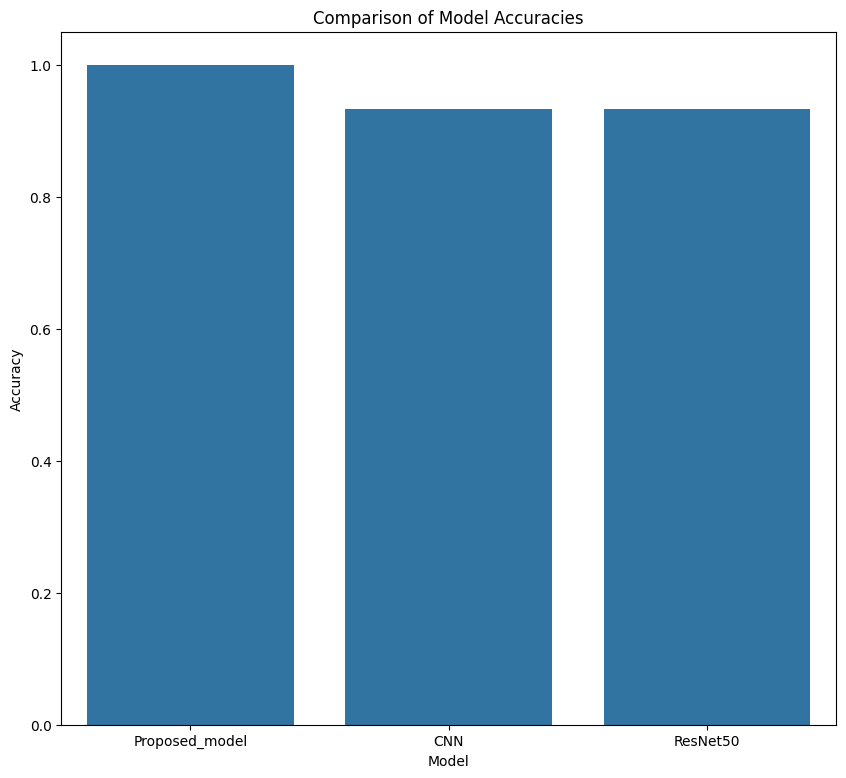

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


mobile_acc = hist.history['accuracy'][-1]
cnn_acc = history.history['accuracy'][-1]
resnet_acc = history.history['accuracy'][-1]


data = {
    'Model': ['Proposed_model', 'CNN', 'ResNet50'],
    'Accuracy': [mobile_acc, cnn_acc, resnet_acc]
}

plt.figure(figsize=(10, 9))
sns.barplot(x='Model', y='Accuracy', data=data)


plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
mobile_acc = hist.history['accuracy'][-1]     # Proposed_model
cnn_acc = history.history['accuracy'][-1]     # CNN
resnet_acc = history.history['accuracy'][-1]  # ResNet50


print(f"Proposed_model Accuracy: {mobile_acc * 100:.2f}%")
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")
print(f"ResNet50 Accuracy: {resnet_acc * 100:.2f}%")


Proposed_model Accuracy: 100.00%
CNN Accuracy: 93.33%
ResNet50 Accuracy: 93.33%
